In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, classification_report

import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

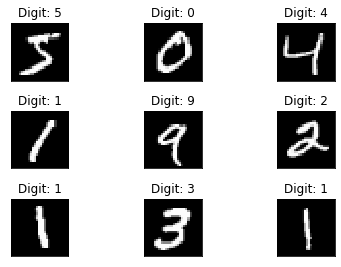

In [3]:
fig = plt.figure()
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    plt.title("Digit: {}".format(y_train[i]))
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap='gray', interpolation='none')

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /=255

In [6]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [7]:
model = Sequential([
                 Dense(128, input_dim = x_train.shape[1], activation = 'relu'),
                 Dropout(0.2),
                 Dense(y_train.shape[1], activation = 'softmax')
])
model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics = ['accuracy'])                       

In [9]:
model.fit(x_train, y_train, batch_size= 40, epochs= 10, validation_data = (x_test, y_test))

Epoch 1/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0436 - accuracy: 0.9855 - val_loss: 0.0720 - val_accuracy: 0.9803 loss: 0.0433 - accuracy: 
Epoch 2/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0380 - accuracy: 0.9878 - val_loss: 0.0710 - val_accuracy: 0.9811
Epoch 3/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0362 - accuracy: 0.9882 - val_loss: 0.0708 - val_accuracy: 0.97870s - loss: 0.0363 - accuracy: 
Epoch 4/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0350 - accuracy: 0.9882 - val_loss: 0.0702 - val_accuracy: 0.9809: 0s - loss: 0.0327 - accura - ETA: 0s - loss: 0.0338 - accuracy
Epoch 5/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0322 - accuracy: 0.9894 - val_loss: 0.0781 - val_accuracy: 0.9801: 0s - loss: 0.0312 - ac - ETA: 0s - loss: 0.0323 - accuracy
Epoch 6/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0325 - accuracy: 0.989

In [11]:
y_pred = model.predict_classes(x_test)

print(f'Train Accuracy: {accuracy_score(np.argmax(y_train, axis=1), model.predict_classes(x_train))}')
print(f'Test Accuracy: {accuracy_score(np.argmax(y_test, axis=1), y_pred)}')

Train Accuracy: 0.9974666666666666
Test Accuracy: 0.9808


Original Image


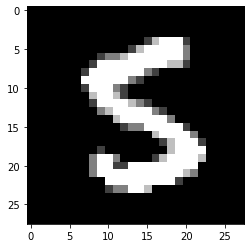

In [12]:
import matplotlib.image as mpimg

testimage = mpimg.imread('test.png')
print('Original Image')
plt.imshow(testimage, cmap=plt.cm.gray)
plt.show()

In [13]:
testimage = testimage.reshape(1,-1)
testimage = testimage.astype('float32')

In [14]:
print('Predicted Value:', model.predict_classes(testimage))

Predicted Value: [5]
